<a href="https://colab.research.google.com/github/stevengregori92/Learn-TimeSeriesForecast/blob/main/Naive_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown https://drive.google.com/uc?id=1H9eWWEeT7bcfveH_SXc_ibnb5m-BXC3s

Downloading...
From: https://drive.google.com/uc?id=1H9eWWEeT7bcfveH_SXc_ibnb5m-BXC3s
To: /content/datats.zip
100% 16.8k/16.8k [00:00<00:00, 58.6MB/s]


In [2]:
!unzip /content/datats.zip

Archive:  /content/datats.zip
  inflating: datats/airline.csv      
  inflating: datats/cheese_fred.csv  
  inflating: datats/christmas.csv    
  inflating: datats/daily_min_temp.csv  
  inflating: datats/perrin_freres_champagne.csv  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('datats/daily_min_temp.csv', index_col='Date', parse_dates=['Date'])
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


#Resampling Data Time Series


https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases


<Axes: xlabel='Date'>

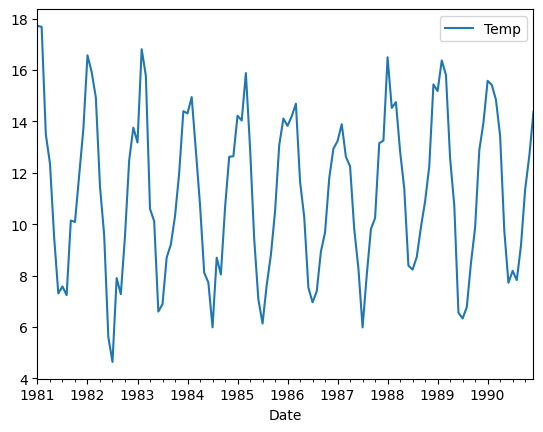

In [5]:
df.resample('M').mean().plot()

In [6]:
df = df.resample('M').mean()
df

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


<Axes: xlabel='Date'>

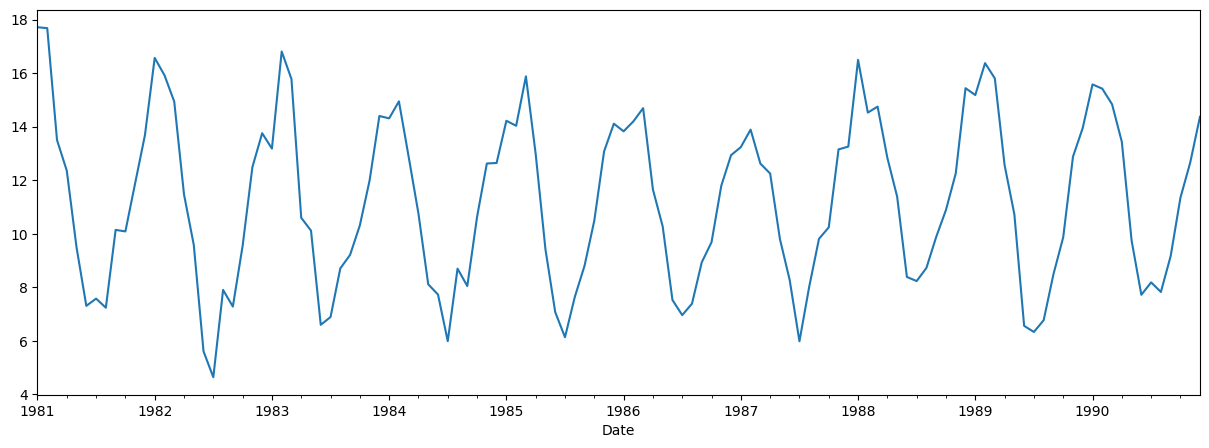

In [7]:
df.Temp.plot(figsize=(15,5))

#Naive Forecasting

One-Shift Forecasting

In [8]:
pred = df.copy()
pred = pred.shift()

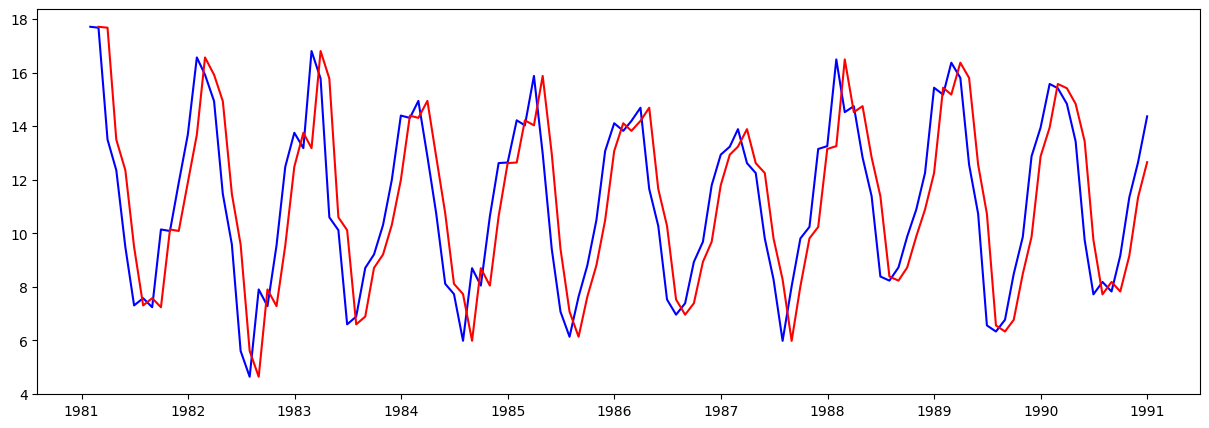

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df, 'b-')
plt.plot(pred, 'r-')

Mean Forecasting

In [10]:
pred = df.copy()
pred.Temp = [df.loc[:date].Temp.mean() for date in df.index]
pred = pred.shift()

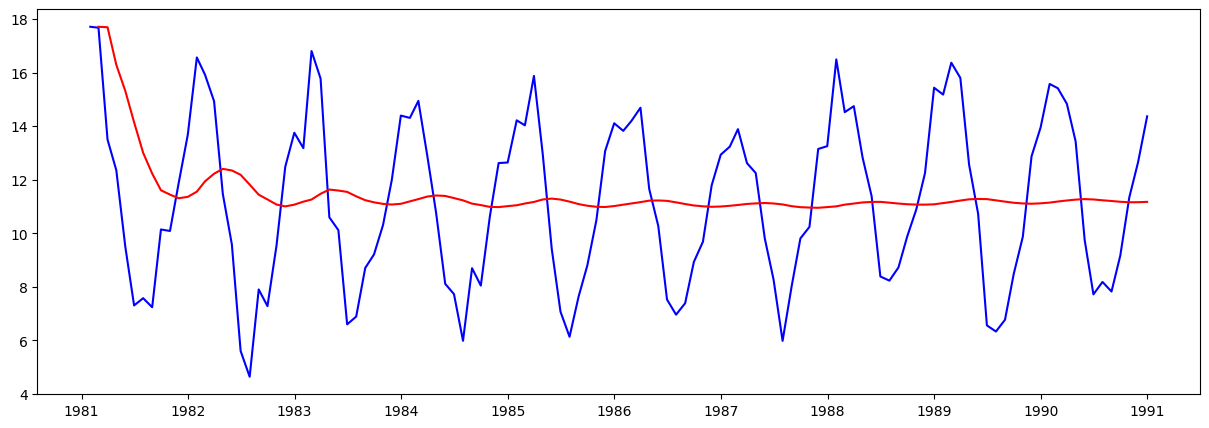

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df, 'b-')
plt.plot(pred, 'r-')

Moving Average/Rolling Mean Forecasting

In [12]:
pred = df.copy()
pred.Temp = df.rolling(3).mean()
pred = pred.shift()

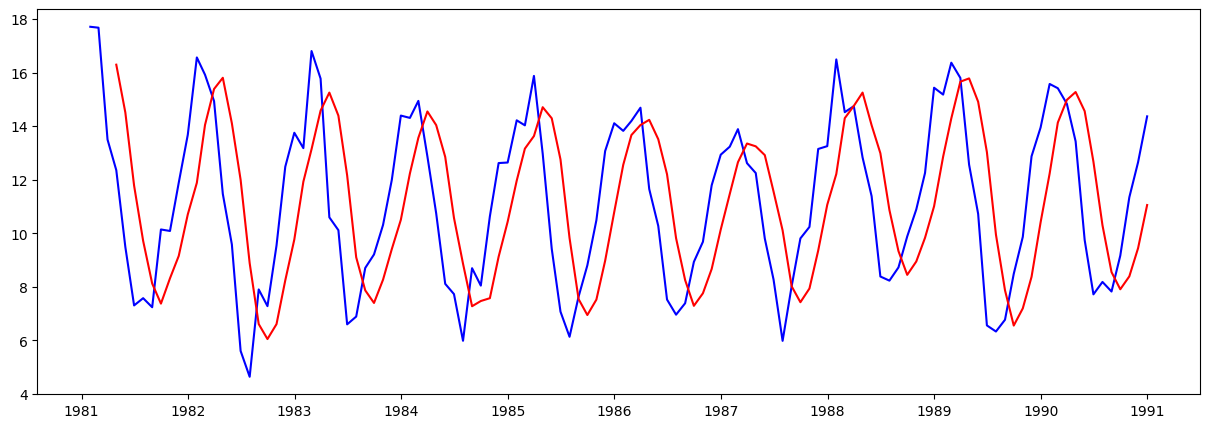

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df, 'b-')
plt.plot(pred, 'r-')